In [36]:
#Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
data = pd.read_csv('Invistico_Airline.csv')
data.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,satisfied
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,satisfied
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,satisfied
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,satisfied
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,satisfied


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [39]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,129880,2,Female,65899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Type,129880,2,Loyal Customer,106100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,129880.0,NaN,NaN,NaN,39.427957,15.11936,7.0,27.0,40.0,51.0,85.0
Type of Travel,129880,2,Business travel,89693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,129880,3,Business,62160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Distance,129880.0,NaN,NaN,NaN,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,NaN,NaN,NaN,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,NaN,NaN,NaN,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,NaN,NaN,NaN,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,NaN,NaN,NaN,2.990422,1.30597,0.0,2.0,3.0,4.0,5.0


In [40]:
data.isnull().sum().sort_values()

,0
Gender,0
Departure Delay in Minutes,0
Online boarding,0
Cleanliness,0
Checkin service,0
Baggage handling,0
Leg room service,0
On-board service,0
Ease of Online booking,0
Online support,0


In [41]:
na_features = [feature for feature in data.columns if data[feature].isnull().sum()>1]

for feature in na_features:
  print(f"{feature}:{data[feature].isna().mean()*100:.3f}%missing value")

Arrival Delay in Minutes:0.303%missing value


In [42]:
data['Arrival Delay in Minutes'].mean()

15.09112883918849

In [43]:
data['Arrival Delay in Minutes'].nunique()

472

In [44]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print(f"No. of Numerical Variable: ",len(numerical_features))
data[numerical_features].head(5)

No. of Numerical Variable:  18


,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [45]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print(f"No. of Categorical Variable: ",len(categorical_features))
data[categorical_features].head(5)

No. of Categorical Variable:  5


,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Female,Loyal Customer,Personal Travel,Eco,satisfied
1,Male,Loyal Customer,Personal Travel,Business,satisfied
2,Female,Loyal Customer,Personal Travel,Eco,satisfied
3,Female,Loyal Customer,Personal Travel,Eco,satisfied
4,Female,Loyal Customer,Personal Travel,Eco,satisfied


In [46]:
data.duplicated().sum()

0

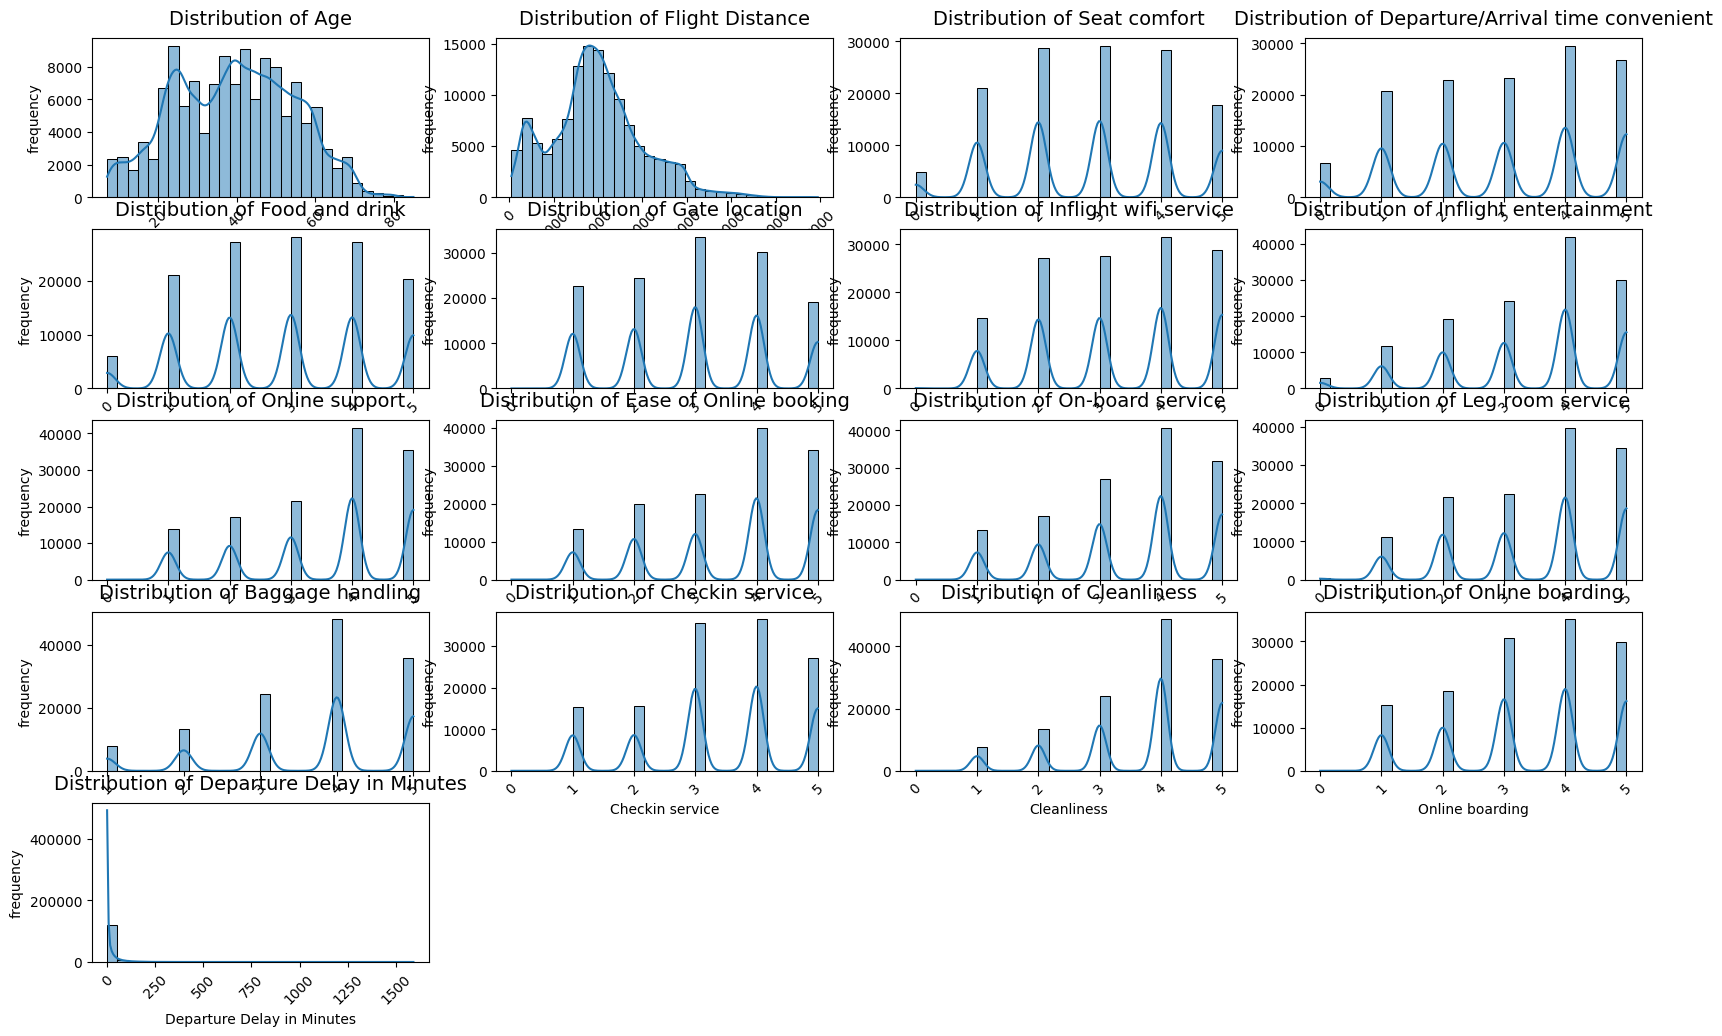

In [47]:
plt.figure(figsize = (20,12),facecolor='white')
plotnumber = 1

for column in data[numerical_features]:
  if plotnumber<len(numerical_features):
    ax = plt.subplot(5,4,plotnumber)
    sns.histplot(data[column],kde = True,bins = 30)
    plt.xlabel(column,fontsize = 10)
    plt.ylabel("frequency",fontsize = 10)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {column}", fontsize=14, pad=10)
  plotnumber+=1
plt.tight_layout
plt.show()

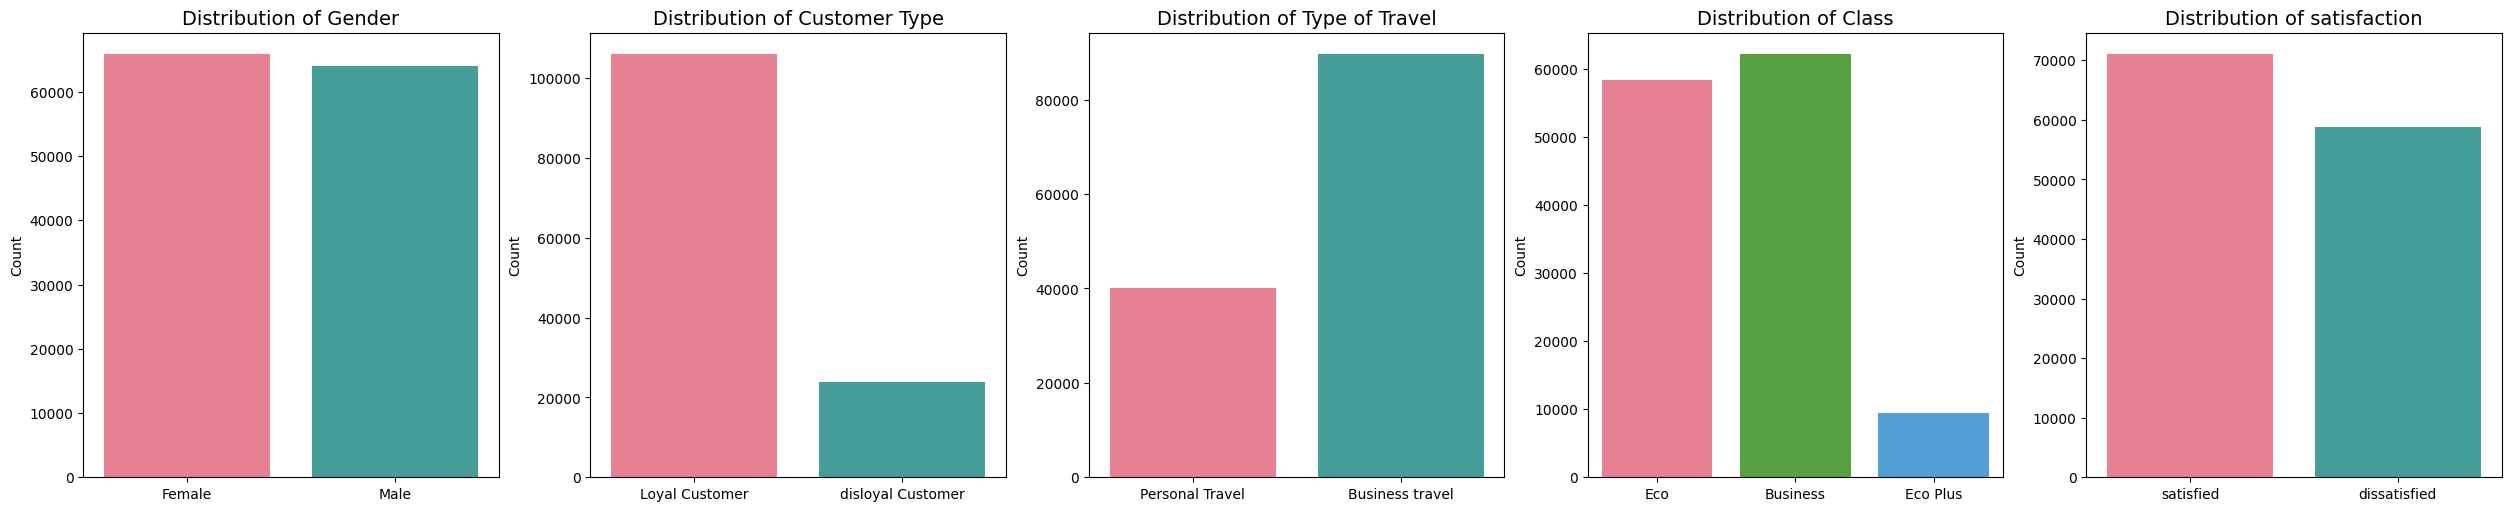

In [48]:
# Univariate Analysis of categorical features
n_features = len(categorical_features)
fig, axes = plt.subplots(nrows=1, ncols=n_features, figsize=(5 * n_features, 5), constrained_layout=True)

# Iterate through categorical features and create a bar plot for each
for i, feature in enumerate(categorical_features):
    sns.countplot(data=data, x=feature, ax=axes[i], palette="husl")
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
plt.show()

In [49]:
data[numerical_features].corr()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,-0.249625,0.008784,0.039055,0.015749,-0.000547,0.013965,0.130511,0.121201,0.071594,0.066704,0.083762,-0.015452,0.031845,-0.018271,0.037973,-0.009041,-0.011248
Flight Distance,-0.249625,1.000000,-0.042409,0.001350,-0.004649,-0.002409,0.012230,-0.027542,-0.032022,-0.022299,-0.032559,-0.030316,0.019768,0.002456,0.009432,0.009604,0.112555,0.110103
Seat comfort,0.008784,-0.042409,1.000000,0.434951,0.715997,0.405300,0.129131,0.426447,0.120278,0.211531,0.121149,0.136136,0.118489,0.041214,0.108475,0.130396,-0.023817,-0.025506
Departure/Arrival time convenient,0.039055,0.001350,0.434951,1.000000,0.527381,0.544259,-0.001974,0.077203,-0.000546,0.001755,0.060446,0.029422,0.067396,0.062794,0.067126,-0.000623,0.004395,0.002599
Food and drink,0.015749,-0.004649,0.715997,0.527381,1.000000,0.523328,0.025917,0.367669,0.028554,0.041189,0.038646,0.074161,0.036370,0.011898,0.033416,0.013587,-0.013433,-0.014881
Gate location,-0.000547,-0.002409,0.405300,0.544259,0.523328,1.000000,-0.004086,-0.000280,0.002908,0.001442,-0.025132,-0.007407,-0.000401,-0.031859,-0.001705,-0.003043,0.003962,0.003640
Inflight wifi service,0.013965,0.012230,0.129131,-0.001974,0.025917,-0.004086,1.000000,0.253823,0.557340,0.601100,0.060794,0.033589,0.038251,0.092508,0.038263,0.631786,-0.032900,-0.035270
Inflight entertainment,0.130511,-0.027542,0.426447,0.077203,0.367669,-0.000280,0.253823,1.000000,0.441957,0.321731,0.183912,0.160731,0.117213,0.224120,0.109451,0.355714,-0.030491,-0.033321
Online support,0.121201,-0.032022,0.120278,-0.000546,0.028554,0.002908,0.557340,0.441957,1.000000,0.617489,0.157930,0.138433,0.102444,0.206824,0.095726,0.669843,-0.034018,-0.036087
Ease of Online booking,0.071594,-0.022299,0.211531,0.001755,0.041189,0.001442,0.601100,0.321731,0.617489,1.000000,0.436264,0.355122,0.398322,0.137744,0.417675,0.684320,-0.036545,-0.039806


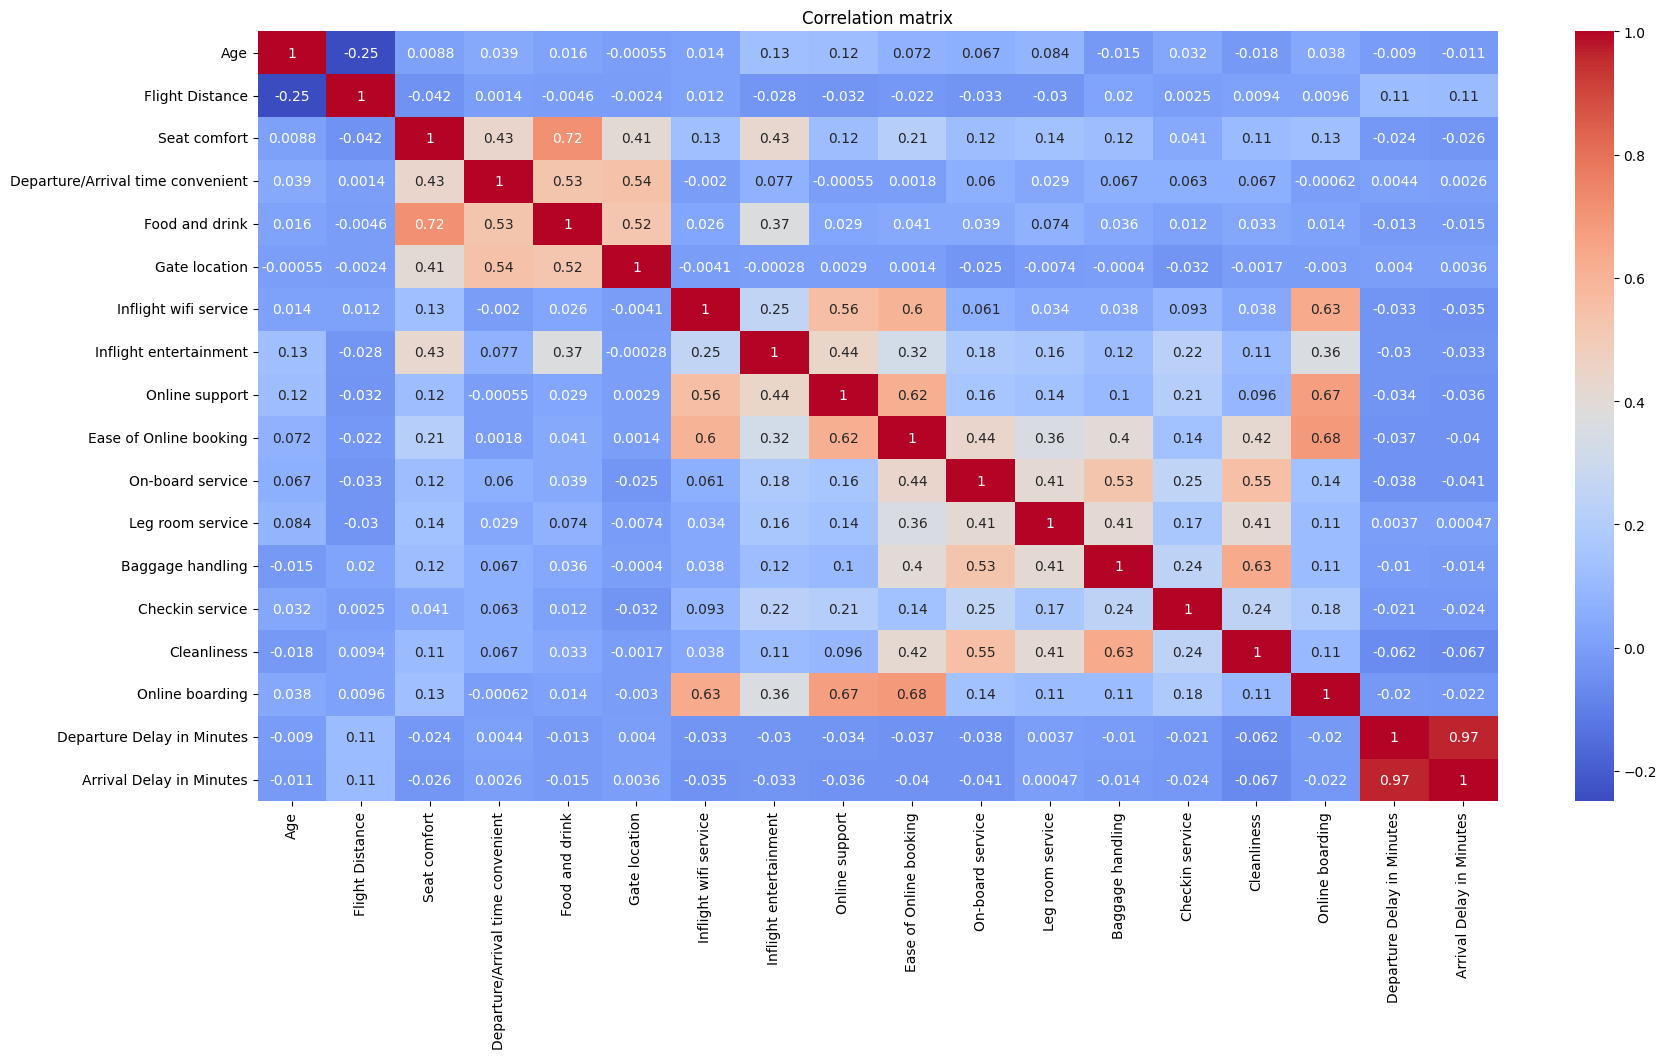

In [50]:
plt.figure(figsize=(20,10))
sns.heatmap(data[numerical_features].corr(),annot=True,cmap = 'coolwarm')
plt.title("Correlation matrix")
plt.show()

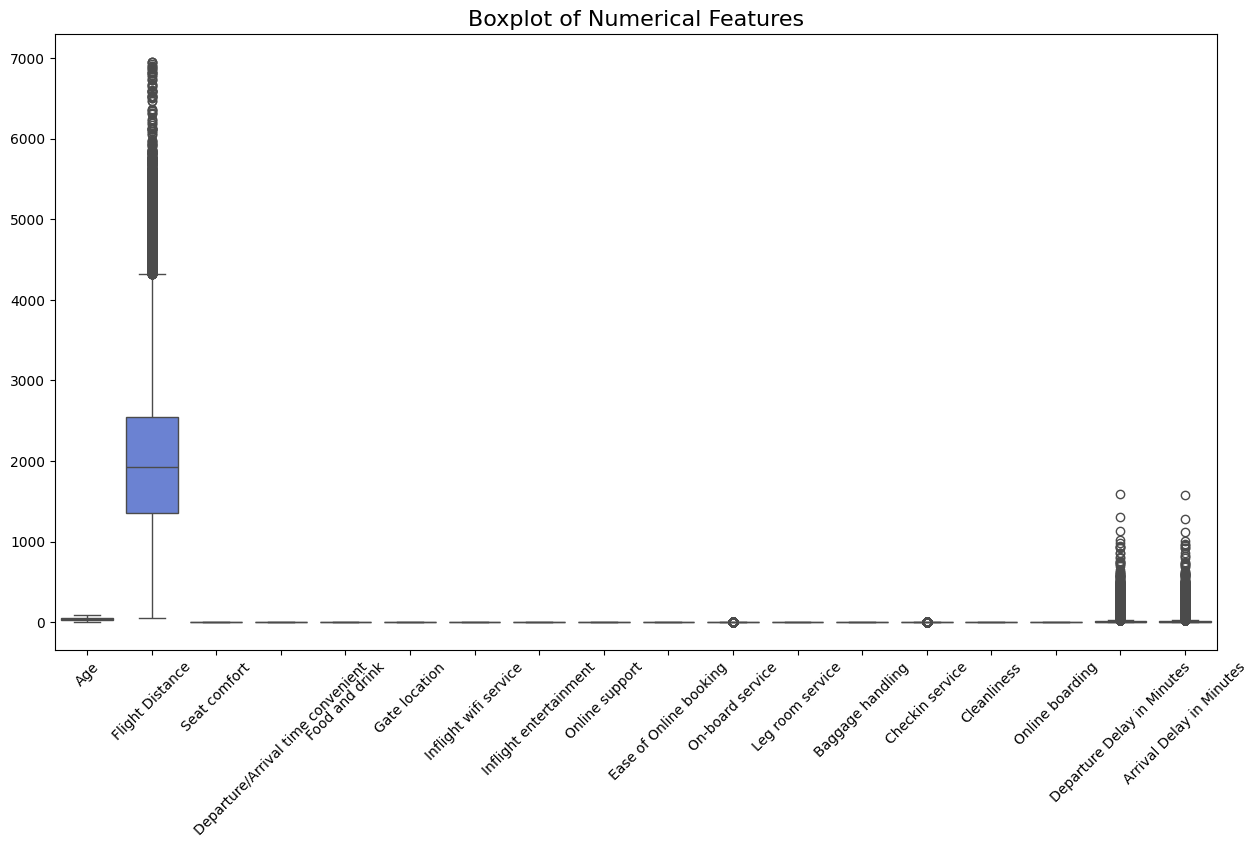

In [51]:
# Boxplot

plt.figure(figsize=(15, 8))
sns.boxplot(data=data[numerical_features], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features", fontsize=16)
plt.show()

In [52]:
#Splitting the data

X = data.drop(['satisfaction'],axis = 1)
y = data['satisfaction']

In [53]:
print(X.shape)
print(y.shape)

(129880, 22)
(129880,)


In [78]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(103904, 22)
(25976, 22)
(103904,)
(25976,)


In [81]:
numerical_features = [feature for feature in X.columns if X[feature].dtype != 'O' and feature != 'satisfaction']
categorical_features = [feature for feature in X.columns if X[feature].dtype == 'O']
impute_feature = ['Arrival Delay in Minutes']

In [82]:
imputer = SimpleImputer(strategy='mean')
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [83]:
preprocessor = ColumnTransformer(transformers=[
    ('imputer', imputer, impute_feature),
    ('cat', categorical_transformer, categorical_features),
    ('num', numerical_transformer, numerical_features)
    ])

In [85]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(random_state=42))])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('imputer', SimpleImputer(),
                                                  ['Arrival Delay in Minutes']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Seat comfort',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Food and drink',
                                                   'Gate location',
                                                   'Inflight wifi service',
                                                   'Inflight entertainment',
                                                   'Online support',
                                                   'Ease of Online booking',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Cleanliness',
                                                   'Online boarding',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in '
                                                   'Minutes'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [86]:
dt_y_pred = pipeline.predict(X_test)

In [88]:
#Accuracy Score

accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9423698798891285


In [89]:
#Confusion Matrix

conf_matrix = confusion_matrix(y_test, dt_y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10910   765]
 [  732 13569]]


In [90]:
class_report = classification_report(y_test, dt_y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

dissatisfied       0.94      0.93      0.94     11675
   satisfied       0.95      0.95      0.95     14301

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



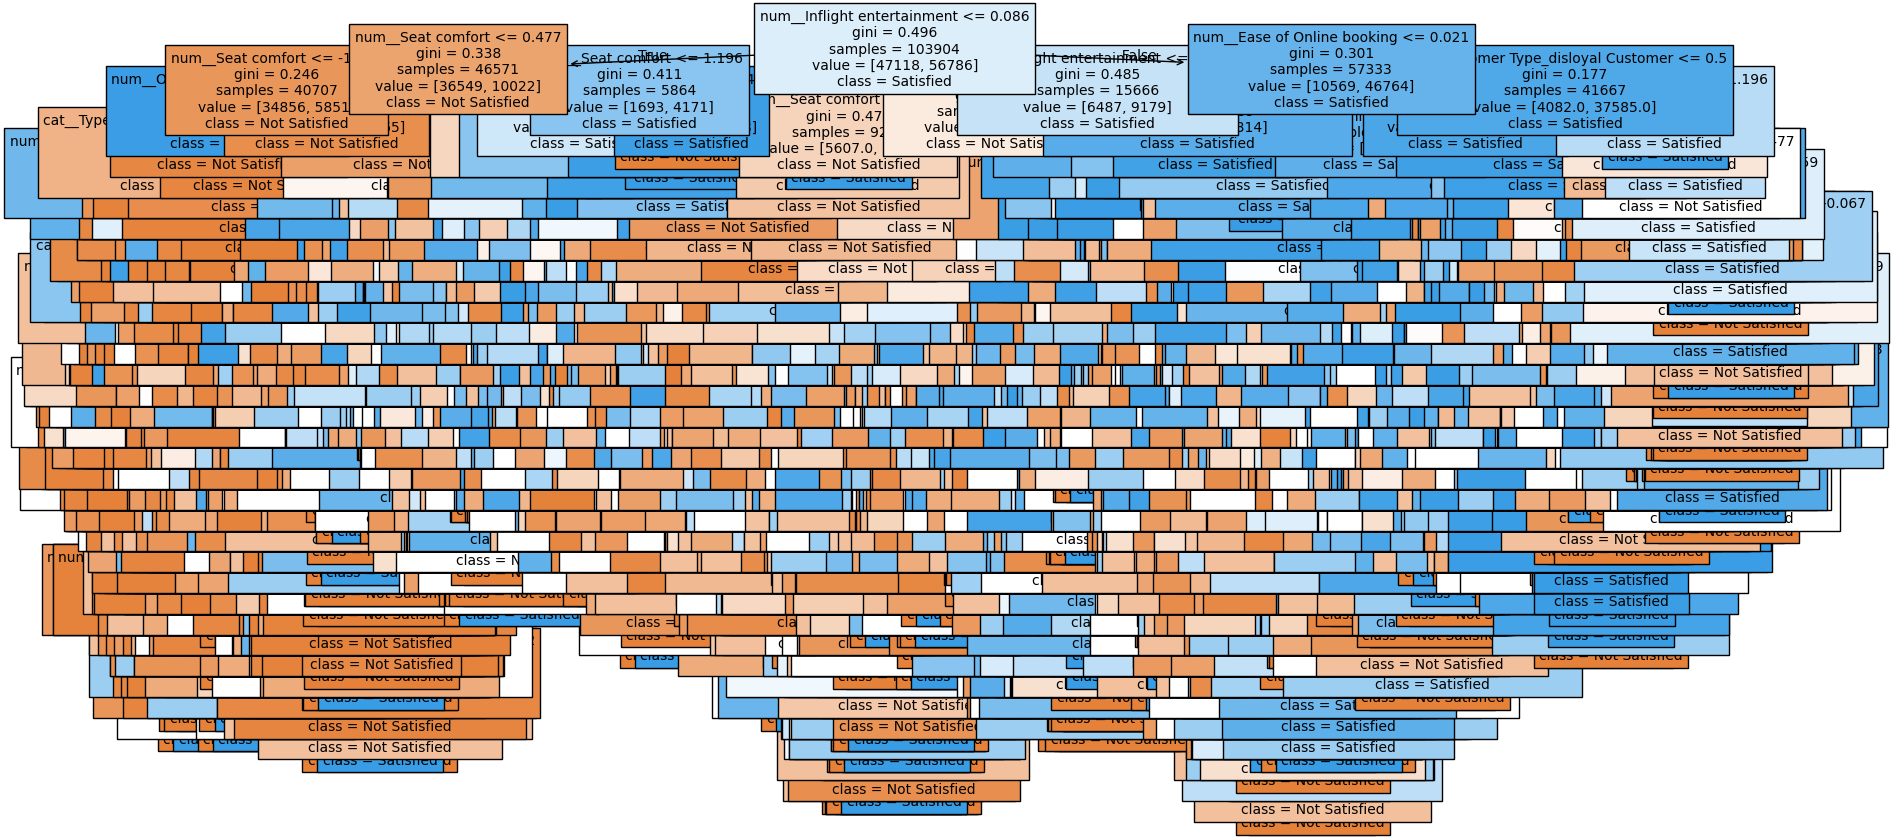

In [93]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(pipeline.named_steps['classifier'],
          filled=True,
          feature_names=pipeline[:-1].get_feature_names_out(),
          class_names=['Not Satisfied', 'Satisfied'],
          fontsize=10)
plt.show()
